# SNLP Assignment 5

Name 1: Entang Wang<br/>
Student id 1: 7069521<br/>
Email 1: enwa00001@stud.uni-saarland.de<br/>


Name 2: <br/>
Student id 2: <br/>
Email 2: <br/> 

Name 3: <br/>
Student id 3: <br/>
Email 3: <br/> 

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook. There is no need to submit the data files. <br/>
Upload the zipped folder on CMS. Please follow the naming convention of **Name1_studentID1_Name2_studentID2_Name3_studentID3.zip**. Make sure to click on "Turn-in" (or the equivalent on CMS) after you upload your submission, otherwise the assignment will not be considered as submitted. Only one member of the group should make the submisssion.

---

## Exercise 1 - Back Off! Probabilities Again! (3 points)

Consider the toy corpus:

>    I study SNLP\
>    study SNLP I\
>    I like to study SNLP\
>    I study SNLP

a. State the Vocabulary of the corpus and unigram counts. What is the bigram probability for the sequence "I like SNLP" using add-epsilon-discounting with ε = 0.5? (0.75 points)

b. Now use a back-off bigram model with absolute discounting (use d=0.75) and a back-off to smoothed unigrams (with the same epsilon ε = 0.5) (0.75 points)

c. Compare the result from both techniques. (0.5 points)

d. To actually estimate these n-gram probabilities over a text corpus, we use **Maximum Likelihood Estimation (MLE)**. The estimate for the parameters of the MLE is obtained by getting counts from the corpus and then normalising them so they lie between 0 and 1. Consider the formula from the slides. 

$$P(w_2 | w_1) = \frac{P(w_1,w_2)}{P(w_1)}$$

Using this, state the empirical formula for finding the conditional probability of unigrams $P(w)$, bigrams $P(w_2|w_1)$, and trigrams $P(w_3|w_1,w_2)$ for a corpus of N words. We do not expect any mathematical proof here, but just the formula for finding the conditional probabilities from the words in the corpus using the shown equation as the starting point. (0.5 points)

e. Using MLE, compute the probabilities for the following (assume we lowercase the corpus):  (0.5 points)\
(i) $p(snlp|study)$ \
(ii) $p(snlp|i \ study)$

---

## Exercise 2 - Good Turing Smoothing (2 points)

Consider the following 2 tables

<table style="display: inline-block; margin-right: 50px;">
  <caption><strong>Good-Turing Count-of-Counts</strong></caption>
  <thead>
    <tr><th>Count (N(w,h))</th><th>Count of Counts (n_N(w,h))</th></tr>
  </thead>
  <tbody>
    <tr><td>1</td><td>5000</td></tr>
    <tr><td>2</td><td>1600</td></tr>
    <tr><td>3</td><td>1000</td></tr>
    <tr><td>4</td><td>600</td></tr>
    <tr><td>5</td><td>300</td></tr>
  </tbody>
</table>

<table style="display: inline-block;">
  <caption><strong>Bigrams with History "wine"</strong></caption>
  <thead>
    <tr><th>Count (N(w,h))</th><th>Bigram</th></tr>
  </thead>
  <tbody>
    <tr><td>1</td><td>wine drinker</td></tr>
    <tr><td>2</td><td>wine lover</td></tr>
    <tr><td>3</td><td>wine glass</td></tr>
  </tbody>
</table>


a. What are the discounted counts under Good–Turing discounting for the three given bigrams?

b. The amounts from discounting counts are given to a back-off unigram model. Using such a back-off model, what are the
probabilities for the following bigrams?\
(i) $p(drinker|wine)$\
(ii) $p(glass|wine)$\
(iii) $p(mug|wine)$\
Note: $p(mug) = 0.015$, $p(drinker)=0.015$, $p(glass)=0.01$ . State any assumptions that you make.

---

## Exercise 3: Cross-Validation (5 points)


Imagine you are a linguist in the remote future who just rediscovered a book called "Bible". To your disappointment the book is obviously incomplete; all the pages between Genesis and the Apocalypse are torn out, maybe by some late Christian cult. Since you don't know the language of the book you want to build a first language model that you can use if you find any of the lost parts. You digitize the book with your state-of-the art portable digitizer, and then load it into one of your Python notebooks.

### 3.1 Baseline

* The two corpora are in the text files `genesis.txt` and `apocalypsis.txt`. Load them into the notebook, preprocess them by removing all non-alphabetical characters, and then concatenate them into a single corpus. Split the corpus into a train and a test set, with the test set comprising the _last_ 20% of the corpus. The functions for `preprocess` and `train_test_split_data` should be implemented in `exercise_3.py` (0.5 points)

In [11]:
# Load data
from importlib import reload
from pathlib import Path

import exercise_3
exercise_3 = reload(exercise_3)

genesis_text = open(Path('data/genesis.txt'), 'r', encoding='utf-8').read().split()
apocalypsis_text = open(Path('data/apocalypsis.txt'), 'r', encoding='utf-8').read().split()

# preprocess
genesis_preprocessed = exercise_3.preprocess(genesis_text)
apocalypsis_preprocessd = exercise_3.preprocess(apocalypsis_text)

# concatenate
corpus = genesis_preprocessed + apocalypsis_preprocessd

# train, test split
train_set, test_set = exercise_3.train_test_split_data(corpus)

* Using the language model class given, we will estimate a trigram language model on the train set and report perplexity on the test set. First, implement the `perplexity` function in `language_model.py` then calculate it using $\alpha=1$. Does this represent an unbiased estimate of the model's capacity? (1 points)

* Answer: This does not represent an unbiased estimate of the model's capacity.

In [7]:
# TODO: trigram LM
from language_model import NGramLM

N = 3
alpha = 1.0

LM = NGramLM(train_set, N, alpha)
perplexity = NGramLM.perplexity(LM, test_set)
print(perplexity)

2103.4044448009477


### 3.2 Average Perplexity

* Since you want to get an unbiased estimate of your model's capacity, you decide to apply k-fold cross-validation on your corpus. To do this, implement the function `k_validation_folds` in `exercise_3.py`. Use it to split your corpus into $k=5$ cross-validation folds, and make sure that the folds are of the same size. (1 point)

* Now, estimate a trigram language model on each of the CV folds. Use the `NGramLM` class, and average over all perplexity scores. Does the average score differ from the one obtained in 3.2, and why? (1 point)

* Answer: The average score differs from the former one. The average perplexity obtained with cross-validation is usually more stable and closer to the overall model performance, whereas the perplexity of a single split is susceptible to bias by chance partitioning.

In [12]:
# 5-fold cross-validation
cv_folds = exercise_3.k_validation_folds(corpus, k_folds=5)
pps = []

# TODO: estimate 5 trigram LMs!
for i, (train_fold, test_fold) in enumerate(cv_folds):
    LM = NGramLM(train_fold, N=3, alpha=1.0)
    perplexity = NGramLM.perplexity(LM, test_fold)
    pps.append(perplexity)
    print(f"Fold {i+1} perplexity: {perplexity}")

print(f"Average perplexity: {sum(pps)/len(pps)}")

Fold 1 perplexity: 1810.3460125077097
Fold 2 perplexity: 1828.6414107455853
Fold 3 perplexity: 1806.0240773260525
Fold 4 perplexity: 1824.5047910811534
Fold 5 perplexity: 2103.6777031426373
Average perplexity: 1874.6387989606276


### 3.3 Hyperparameter Tuning

* As you don't know anything about the language the book is written in, you have to find the best hyperparemter $\alpha$ for your model by a brute-force search. Since you know from 3.2 that your data is not balanced, you decide to use only the averaged perplexity score (derived from $k=5$ CV folds) for this. Do so by completing the loop in the code cell below. Then, plot the obtained perplexity scores vs. $\alpha$. Implement the function `plot_pp_vs_alpha` in `exercise_3.py` for this. (1 point)

**Hint:** This could take a while.

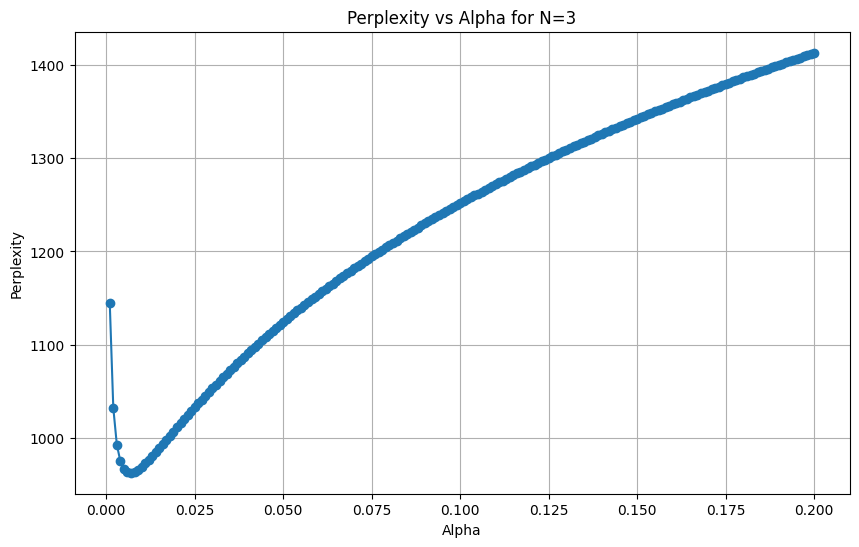

In [18]:
# hyperparamter tuning, CV for trigram
alphas = [x*0.001 for x in range(1,201)]

avg_pps = []
for alpha in alphas:
    pps = []
    for i, (train_fold, test_fold) in enumerate(cv_folds):
        LM = NGramLM(train_fold, N=3, alpha=alpha)
        perplexity = NGramLM.perplexity(LM, test_fold)
        pps.append(perplexity)
    avg_pp = sum(pps) / len(pps)
    avg_pps.append(avg_pp)
    
# Plot average perplexity vs alpha
exercise_3.plot_pp_vs_alpha(avg_pps, alphas, N=3)

* Repeat the tuning process for unigram and bigram language models. Does your estimate of $\alpha$ differ? Why? (0.5 points)
* Answer: The estimate of $\alpha$ differs for unigram and bigram models because the two models capture different levels of context. Unigram models only consider individual words, while bigram models take into account the relationship between pairs of words. This can lead to different optimal values of $\alpha$ for each model, as they may require different levels of smoothing to achieve the best performance.  

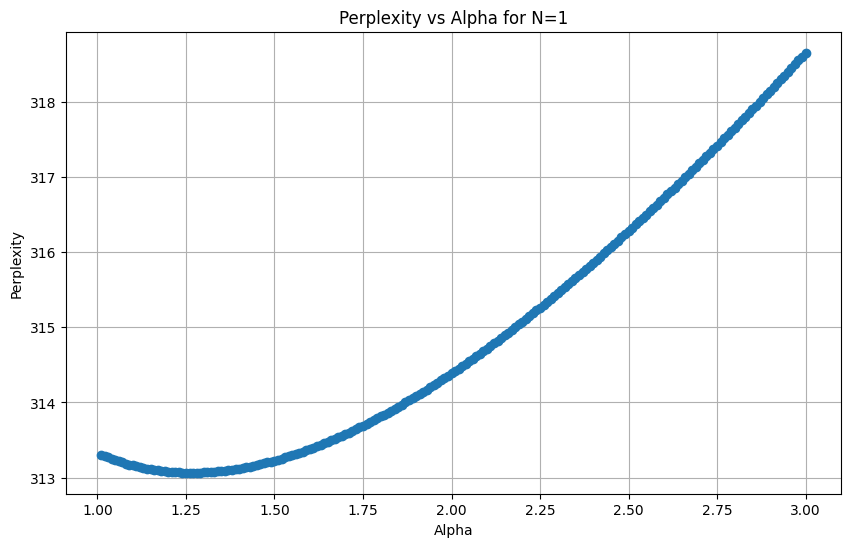

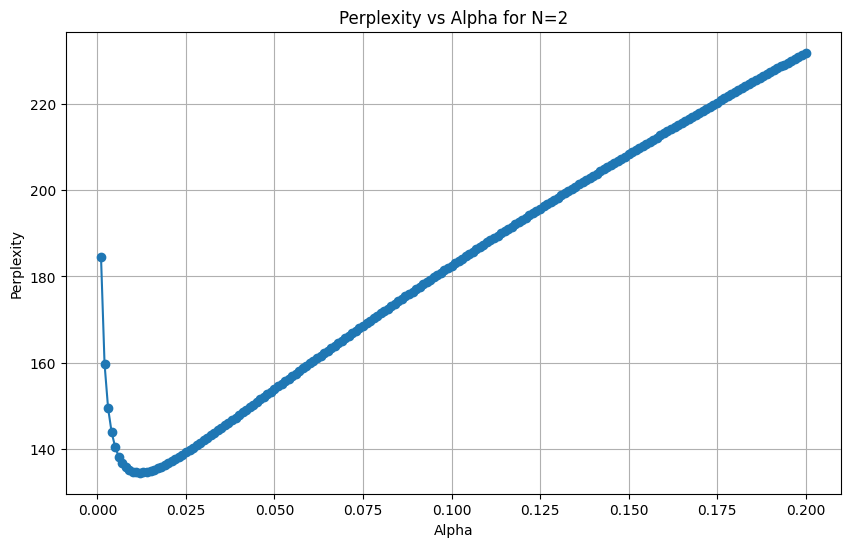

In [24]:
# hyperparamter tuning, unigram + bigram
uni_alphas = [x*0.01 for x in range(101,301)]
bi_alphas = [x*0.001 for x in range(1,201)]
avg_pps_unigram = []
avg_pps_bigram = []

# TODO: estimate LMs!
for uni_alpha in uni_alphas:
    pps_unigram = []
    for i, (train_fold, test_fold) in enumerate(cv_folds):
        UniGram = NGramLM(train_set, N=1, alpha=uni_alpha)
        perplexity_unigram = NGramLM.perplexity(UniGram, test_fold)
        pps_unigram.append(perplexity_unigram)
    
    avg_pp_unigram = sum(pps_unigram) / len(pps_unigram)
    avg_pps_unigram.append(avg_pp_unigram)
    
for bi_alpha in bi_alphas:
    pps_bigram = []
    for i, (train_fold, test_fold) in enumerate(cv_folds):
        BiGram = NGramLM(train_set, N=2, alpha=bi_alpha)
        perplexity_bigram = NGramLM.perplexity(BiGram, test_fold)
        pps_bigram.append(perplexity_bigram)
    
    avg_pp_bigram = sum(pps_bigram) / len(pps_bigram)
    avg_pps_bigram.append(avg_pp_bigram)

# TODO: plot!
exercise_3.plot_pp_vs_alpha(avg_pps_unigram, uni_alphas, N=1)
exercise_3.plot_pp_vs_alpha(avg_pps_bigram, bi_alphas, N=2)

--- 

## Bonus Question (2 points)

Read the Research Paper, [Tokenization and the Noiseless Channel](https://arxiv.org/pdf/2306.16842) . The author proposes a new way to evaluate tokenization techniques in NLP using information theory. Specifically, the author introduces the concept of "channel efficiency" which measures the information in a model, received from the tokenizer, via Rényi entropy. The authors find that a Rényi entropy with α = 2.5 correlates strongly (0.78) with BLEU scores in machine translation tasks, outperforming traditional metrics like compressed length.


Discuss the reasoning behind using Rényi entropy as an evaluator of tokenization efficiency, over Shannon entropy. Furthermore, discuss the implications of this finding for the design of tokenizers in NLP pipelines, particularly in tasks like machine translation.